# TCAC Affordable Housing Projects

## Exploring TCAC Data Again

Let's explore this TCAC data again.

First we import the pandas library and the data file.

In [1]:
# we import this so we can process this csv file
import pandas as pd
# now import the csv file and take a look at the info.
projects = pd.read_csv('data/LAProjects.csv')
projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 68 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Application Number              1306 non-null   object 
 1   Unnamed: 1                      0 non-null      float64
 2   Type of tax credit funding      1120 non-null   object 
 3   Project Name                    1306 non-null   object 
 4   Project Address                 1306 non-null   object 
 5   Project City                    1306 non-null   object 
 6   Project Zip Code                1306 non-null   object 
 7   Project Phone Number            943 non-null    object 
 8   Project County                  1306 non-null   object 
 9   California Assembly District    1241 non-null   float64
 10  California Senate District      1241 non-null   float64
 11  Federal Congressional District  1237 non-null   float64
 12  Census Tract                    12

And let's take a peek at the first few rows

In [2]:
projects.head()

,Application Number,Unnamed: 1,Type of tax credit funding,Project Name,Project Address,Project City,Project Zip Code,Project Phone Number,Project County,California Assembly District,...,Management Company Fax,Developer,Annual Federal Award,Total State Award,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,CA-2000-858,NaN,4%,Main Street Plaza,"333 West Main Street, Alhambra, CA 918017427",Alhambra,91801,626-289-5800,Los Angeles,49.0,...,310-432-0888,NaN,"$486,869",$0,NaN,NaN,NaN,NaN,NaN,NaN
1,CA-2005-863,NaN,4%,Wysong Village Apartments,"111 North Chapel Avenue, Alhambra, CA 918010000",Alhambra,91801,626-284-3956,Los Angeles,49.0,...,614-273-2154,National Church Residences,"$293,106",$0,NaN,NaN,NaN,NaN,NaN,NaN
2,CA-1992-901,NaN,4%,Altadena Vistas Apartments,"815 E. Calaveras Street, Altadena, CA 91001",Altadena,91001,323-734-2111,Los Angeles,41.0,...,310-358-3494,L.A. Community Development Commission,"$74,027",$0,NaN,NaN,NaN,NaN,NaN,NaN
3,CA-2003-819,NaN,4%,Heritage Park at Arcadia,"150 West Las Tunas Drive, Arcadia, CA 91007",Arcadia,91007,626-821-9048,Los Angeles,49.0,...,9167730529,"American Senior Living, Inc.","$295,337",$0,NaN,NaN,NaN,NaN,NaN,NaN
4,CA-2010-830,NaN,4%,Campus Commons,"16 Campus Drive, Arcadia, CA 91007",Arcadia,91007,626.445.7017,Los Angeles,49.0,...,559.476.5538,"Ashwood Construction, Inc","$383,390",$0,NaN,NaN,NaN,NaN,NaN,NaN


## Chart time

Ok so maybe we can try to make some basic plotly bar charts with some of these columns.

In [15]:
#import plotly to make some nice charts
import plotly.express as px

px.bar(projects,
       x='Project City',
       title='Location of projects'
      )

So, that is really hard to read at this scale, but obviously they're mostly located in the city of Los Angeles so let's just focus on those and let's look at the table to see the values instead for now.

In [4]:
# make a new data frame based on the projects that have a Project City listed as Los Angeles
la_projects = projects.loc[projects['Project City'] == 'Los Angeles']

#Show me the first few to make sure I did it right
la_projects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 806 entries, 238 to 1043
Data columns (total 68 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Application Number              806 non-null    object 
 1   Unnamed: 1                      0 non-null      float64
 2   Type of tax credit funding      647 non-null    object 
 3   Project Name                    806 non-null    object 
 4   Project Address                 806 non-null    object 
 5   Project City                    806 non-null    object 
 6   Project Zip Code                806 non-null    object 
 7   Project Phone Number            587 non-null    object 
 8   Project County                  806 non-null    object 
 9   California Assembly District    749 non-null    float64
 10  California Senate District      749 non-null    float64
 11  Federal Congressional District  745 non-null    float64
 12  Census Tract                    7

Ok, let's try making another graph this time only of this subset of projects in Los Angeles. Maybe we can break it into the zipcode.

In [5]:
px.bar(projects,
       x='Project Zip Code',
       title='Los Angeles TCAC Projects by Zip Code'
      )

Um. There's nothing showing up here. I'm not sure why. I think it's confused because the zipcode looks like a regular number. So maybe we'll try something else. Let's git rid of a few columns to clean this thing up a bit first and maybe try a different column to see if something different happens.

In [14]:
la_projects_trimmed = la_projects[['Type of tax credit funding',
 'Project Name',
 'Project Address',
 'Project City',
 'Project Zip Code',
 'Project County',
 'Census Tract',
 'Housing Type',
 'Total Units',
 'Low Income Units',
 'Annual Federal Award',
 'Total State Award',
]]
# show a preview of the first 5 rows.
la_projects_trimmed.head()

,Type of tax credit funding,Project Name,Project Address,Project City,Project Zip Code,Project County,Census Tract,Housing Type,Total Units,Low Income Units,Annual Federal Award,Total State Award
238,9%,MidCities,"835 S. Oxford Avenue, Los Angeles, CA 90005",Los Angeles,90005,Los Angeles,2125.02,Non Targeted,59.0,59.0,"$62,158","$315,660"
239,9%,Kingswood Apartments,"5173 Hollywood Blvd., Los Angeles, CA 90027",Los Angeles,90027,Los Angeles,1904.01,Non Targeted,43.0,43.0,"$303,872","$1,006,200"
240,9%,S. Norton Avenue,"1121 S. Norton Ave, Los Angeles, CA 90019",Los Angeles,90019,Los Angeles,2129,Large Family,20.0,20.0,"$15,388","$50,620"
241,9%,Virginia Avenue,"5623 W. Virginia Ave., Los Angeles, CA 90038",Los Angeles,90038,Los Angeles,1909.01,Non Targeted,28.0,20.0,"$25,827","$84,770"
242,9%,Flores Apartments,"1507 W. Pico Blvd., Los Angeles, CA 90027",Los Angeles,90027,Los Angeles,2100.10,Non Targeted,26.0,26.0,"$26,721","$102,000"


# Looking at the data by housing type

In [7]:
px.bar(la_projects_trimmed,
       x='Housing Type',
       title='TCAC Projects by Housing Type in the City of Los Angeles'
      )

Ok cool, this is looking better, at least it's telling us something more interesting here. But it's weird how there's all these little stripes across each of the bars. I just want one solid bar for each one instead of a bunch of little bars stacked on top of each other. How about we get a table so we can see the actual numbers for these different housing types

In [8]:
# First show me the unique types 
la_projects_trimmed['Housing Type'].unique()

array(['Non Targeted', 'Large Family', 'Senior', 'SRO', 'Special Needs',
       'At-Risk', 'Non-Targeted', 'Seniors', 'Special Needs/SRO',
       'New Construction'], dtype=object)

In [9]:
# Now make a data frame with just these LA projects by type
la_projects_by_type = la_projects_trimmed['Housing Type'].value_counts().reset_index()
la_projects_by_type

,index,Housing Type
0,Large Family,328
1,Special Needs,115
2,Non Targeted,89
3,Senior,69
4,Non-Targeted,62
5,At-Risk,57
6,SRO,54
7,Seniors,29
8,Special Needs/SRO,2
9,New Construction,1


This is nicer, but there's this weird thing with the column titles again. We should rename them to something that makes sense, like Housing Type and Count.

In [10]:
la_projects_by_type.columns=['Housing Type','Count']
la_projects_by_type

,Housing Type,Count
0,Large Family,328
1,Special Needs,115
2,Non Targeted,89
3,Senior,69
4,Non-Targeted,62
5,At-Risk,57
6,SRO,54
7,Seniors,29
8,Special Needs/SRO,2
9,New Construction,1


Much better. This table is making more sense now. Maybe this would be a good dataset to map. Time to import some map libraries. 

# Mapping!

We'll use the osmnx library to import open streetmap and visualize the data on a basemap.

In [11]:
# to download osm data
import osmnx as ox

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx


Let's just try one random address on a map.

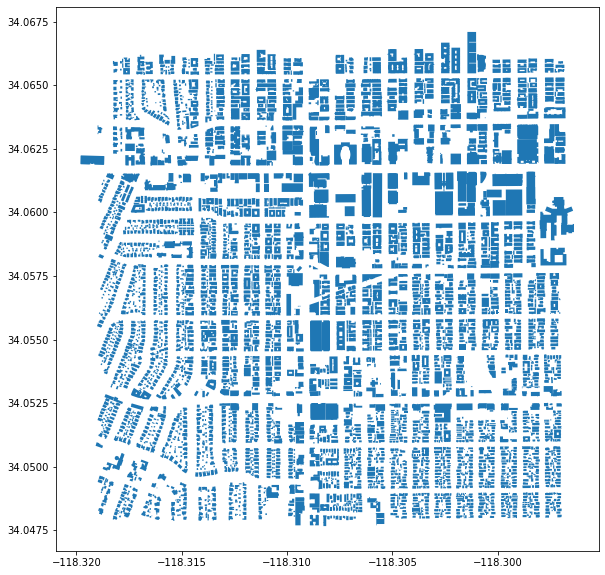

In [12]:
address = '835 S. Oxford Avenue, Los Angeles, CA 90005'
osm = ox.geometries_from_address(address,tags={'building':True},dist=1000)
ax = osm.plot(figsize=(10,10))

This is a nice map, but hmm... actually it's not the kind of map I'm looking for. I actually just want to put a point on a regular map. I have the address but just need to geocode it to a lat/long. Searched the documentation and found this here: https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=geocode#osmnx.geocoder.geocode

In [13]:
sample_project_location = ox.geocoder.geocode(address)
sample_project_location

(34.056998040816325, -118.30791791836734)

omg. I think it worked! Let's try to put it on a map now. But... I think I need to split this into a lat long as an x and y value. Here it looks like one coordinate. So, let's create a new data frame with just the info 

In [26]:
# create an Empty DataFrame object with columns and take a look at the empty table to make sure we have the right ones showing up.

project_locations = pd.DataFrame(columns = [[
     'Project Address','lat','lon']])

project_locations.head()                                               
                                             

,Project Address,lat,lon


In [27]:
# loop through list and add to dataframe with lat/lon's
for address in la_projects_trimmed['Project Address']:
    # geocode it
    geocoded_address = ox.geocoder.geocode(address)
    
    # print the output
    # print(address + ' geocoded to ' + str(geocoded_address[0])+' '+str(geocoded_address[1]))
    
    # add it to the dataframe
    project_locations = project_locations.append({'Project Address': address, 'lat': geocoded_address[0], 'lon': geocoded_address[1]}, ignore_index=True)

project_locations.head()    

TypeError: Expected tuple, got str